In [319]:
import numpy as np

import os
import time
import warnings

import pandas as pd
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

from keras.layers import RepeatVector
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
sales_data = pd.read_csv("time-series/data/tractor-sales.csv")
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data.head(5)

,Tractor-Sales
0,141
1,157
2,185
3,199
4,203


In [321]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [322]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
sales_data.set_index(dates, inplace=True)

In [323]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']

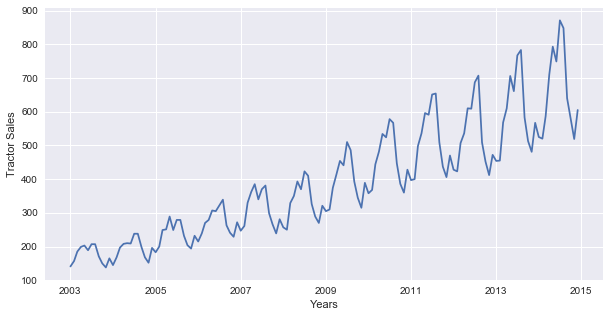

In [324]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales');

In [325]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [326]:
# load the dataset
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = sales_ts.values
dataset = dataset.astype('float32')

In [327]:
dataset

array([ 141.,  157.,  185.,  199.,  203.,  189.,  207.,  207.,  171.,
        150.,  138.,  165.,  145.,  168.,  197.,  208.,  210.,  209.,
        238.,  238.,  199.,  168.,  152.,  196.,  183.,  200.,  249.,
        251.,  289.,  249.,  279.,  279.,  232.,  204.,  194.,  232.,
        215.,  239.,  270.,  279.,  307.,  305.,  322.,  339.,  263.,
        241.,  229.,  272.,  247.,  261.,  330.,  362.,  385.,  340.,
        370.,  381.,  299.,  266.,  239.,  281.,  257.,  250.,  329.,
        350.,  393.,  370.,  423.,  410.,  326.,  289.,  270.,  321.,
        305.,  310.,  374.,  414.,  454.,  441.,  510.,  486.,  393.,
        345.,  315.,  389.,  358.,  368.,  444.,  482.,  534.,  524.,
        578.,  567.,  447.,  386.,  360.,  428.,  397.,  400.,  498.,
        536.,  596.,  591.,  651.,  654.,  509.,  437.,  406.,  470.,
        428.,  423.,  507.,  536.,  610.,  609.,  687.,  707.,  509.,
        452.,  412.,  472.,  454.,  455.,  568.,  610.,  706.,  661.,
        767.,  783.,

In [328]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [329]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

In [330]:
train_size

96

In [331]:
test_size

48

In [332]:
test_size + train_size

144

In [333]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [334]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [335]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [336]:
model = Sequential()

model.add(LSTM(units=50, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation("linear"))

In [337]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3s - loss: 0.0183
Epoch 2/100
1s - loss: 0.0079
Epoch 3/100
1s - loss: 0.0076
Epoch 4/100
1s - loss: 0.0069
Epoch 5/100
1s - loss: 0.0076
Epoch 6/100
1s - loss: 0.0078
Epoch 7/100
1s - loss: 0.0065
Epoch 8/100
1s - loss: 0.0061
Epoch 9/100
1s - loss: 0.0060
Epoch 10/100
1s - loss: 0.0082
Epoch 11/100
1s - loss: 0.0067
Epoch 12/100
1s - loss: 0.0051
Epoch 13/100
1s - loss: 0.0056
Epoch 14/100
1s - loss: 0.0055
Epoch 15/100
1s - loss: 0.0057
Epoch 16/100
1s - loss: 0.0056
Epoch 17/100
1s - loss: 0.0046
Epoch 18/100
1s - loss: 0.0042
Epoch 19/100
1s - loss: 0.0049
Epoch 20/100
1s - loss: 0.0047
Epoch 21/100
1s - loss: 0.0040
Epoch 22/100
1s - loss: 0.0041
Epoch 23/100
1s - loss: 0.0046
Epoch 24/100
1s - loss: 0.0041
Epoch 25/100
1s - loss: 0.0050
Epoch 26/100
1s - loss: 0.0037
Epoch 27/100
1s - loss: 0.0033
Epoch 28/100
1s - loss: 0.0041
Epoch 29/100
1s - loss: 0.0049
Epoch 30/100
1s - loss: 0.0036
Epoch 31/100
1s - loss: 0.0042
Epoch 32/100
1s - loss: 0.0037
Epoch 33/100
1s -

In [338]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [339]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [340]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 37.82 RMSE


In [341]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 86.79 RMSE


In [342]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : look_back + len(trainPredict), :] = trainPredict

In [343]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back + len(trainPredict) + look_back + 1: len(dataset) - 1, :] = testPredict

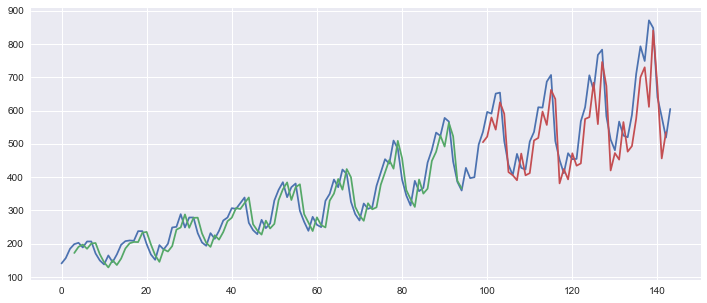

In [361]:
# plot baseline and predictions
plt.figure(figsize=(12, 5))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Forecasting

In [345]:
dataset = sales_ts.values
dataset = dataset.astype('float32')

In [346]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [347]:
data = np.expand_dims(dataset[-look_back:], axis=0)
data

array([[[ 0.60436559],
        [ 0.51978171],
        [ 0.63710779]]], dtype=float32)

In [348]:
data[0]

array([[ 0.60436559],
       [ 0.51978171],
       [ 0.63710779]], dtype=float32)

In [349]:
forecast_window = 3

In [350]:
curr_frame = data[0]
predicted = []
for i in range(forecast_window):
    predicted.append(model.predict(np.expand_dims(curr_frame, axis=0))[0, 0])
    curr_frame = curr_frame[1:]
    curr_frame = np.insert(curr_frame, [look_back - 1], predicted[-1], axis=0)

In [351]:
predicted

[0.63018489, 0.55916888, 0.48246813]

In [352]:
len(dataset)

144

In [353]:
len(predicted)

3

In [354]:
actual = np.empty(shape=(len(dataset) + forecast_window, 1))
actual[:, :] = np.nan

In [355]:
forecasts = np.empty_like(actual)
forecasts[:, :] = np.nan

In [356]:
dataset.shape

(144, 1)

In [357]:
actual.shape

(147, 1)

In [358]:
actual[0:len(dataset),:] = dataset
forecasts[len(dataset):] = np.reshape(predicted, (forecast_window, 1))

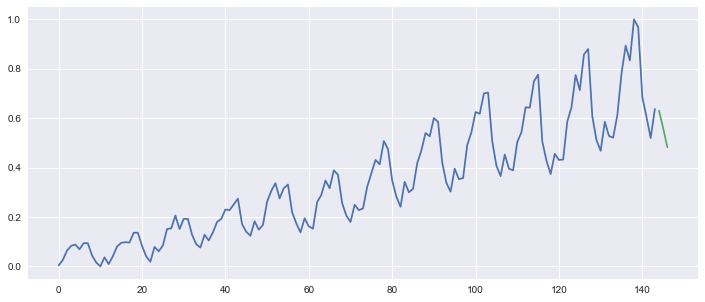

In [362]:
plt.figure(figsize=(12, 5))
plt.plot(actual)
plt.plot(forecasts);